--- 
Replication Project for Microeconometrics course | Summer 2021, M.Sc. Economics, Bonn University | [Aysu Avcı](https://github.com/aysuavci)

# Replication of Zimmermann (2020) <a class="tocSkip">   
---

This notebook contains the replication of the following study:

> [Zimmermann, F. (2020). The Dynamics of Motivated Beliefs. American Economic Review, 110(2), 337–363](https://www.aeaweb.org/articles?id=10.1257/aer.20180728).


##### Notes:

* I try to remain true to the original naming of the variables, however, I renamed all of the figures and tables according to sections in this notebook to avoid any confusions that might arise due to having two replications.
* For convenience, I decided to keep some of the coding in the notebook which I have seen essential for understanding the steps taken in replication. 

* The responsitory can be downloaded from [here](https://github.com/OpenSourceEconomics/ose-data-science-course-project-aysuavci), for the best viewing.

In [58]:
!pip install jupyter_contrib_nbextensions

In [1]:
!pip install stargazer

In [2]:
!pip install matplotlib

In [3]:
!pip install -U matplotlib

Requirement already up-to-date: matplotlib in /Users/aysuavci/opt/anaconda3/lib/python3.8/site-packages (3.4.2)


In [4]:
%matplotlib inline
import numpy as np
import pandas as pd
import pandas.io.formats.style
import seaborn as sns
import statsmodels as sm
import statsmodels.formula.api as smf
import statsmodels.api as sm_api
import matplotlib as plt
from IPython.display import HTML
from stargazer.stargazer import Stargazer, LineLocation
from statsmodels.iolib.summary2 import summary_col

In [5]:
from auxiliary.auxiliary_tools import *
from auxiliary.auxiliary_plots import *
from auxiliary.auxiliary_tables import *

---
# 1.Introduction 
---

The study of Zimmermann(2020) is a lab experiment aiming to examine how motivated beliefs held by individuals continues to be sustained after receiving positive or negative feedback.
The study can be divided into 3 parts:

1. The first part of the study-named “**Motivated Belief Dynamics**” in the paper- is the main study for investigating the causality between different types of feedback (positive or negative) received and reconstruction of belief patterns depending on the elicitation time (directly or 1 month) of the belief after the experiment. 
2. The second part of the study-named “**The Role of Memory**” in the paper- investigates the asymmetry in the accuracy of feedback recall and also recall of IQ test in general that they solve as a part of the experiment. 
3. The final part of the study-named “**The Trade-Off between Motivated and Accurate Belief**” in the paper- that questions whether incentivizing for recall accuracy could mitigate the motivated reasoning that participants employ.

In this project notebook, the main study-first part- will be replicated; the part where Zimmermann (2020) used also **difference-in-difference (DID) models** for their estimations. In the next section (Section 2), I will give a quick literature background for the experiment and also specify the researcher’s hypothesis. In Section 3, I will explain the relevant parts of the experimental design and introduce treatment groups and variables for convenience. The identification part (Section 4) will explain the causality studied by Zimmermann (2020) and the empirical strategy part (Section 5) will present the established models for estimations. Section 6 is the replication part where the figures and tables from the main study and relevant Appendix parts are presented. The extension of this project is located in Section 7 where I replicate the study of Eil and Rao (2022)  as well as including some data visualization and further analysis. Finally, Section 8 includes my concluding remarks.

---
# 2. Background for the Experiment and Hypothesis
---
Personally, I have always been interested in the question of how individual beliefs are formed and sustained or changed over time. In the neoclassical economics framework, any changes in beliefs follow Bayes Rule’s since it is accepted that all agents are rational and unbiased. However, many studies in the literature of motivated beliefs showed that individuals deviate from these Bayesian predictions and manipulate their beliefs in a self-serving way; and some studies like Eil and Rao 2011 or Zimmermann 2020 tried to address the asymmetry in belief updating as well. I see the study of Zimmermann (2020) as an influential study to study motivated belief dynamics because of the experiment design that is been employed. The design of Zimmermann (2020) allows comparing the belief updating across signals received (asymmetry) and also across time (short-run and long-run updating) by employing control and various treatment groups.
 
**Main Hypothesis:** *Individuals’ engagement with belief updating follows an asymmetric pattern, putting more weight on positive signals and less on the negative signals, which is more pronounced for long-term since negative signal’s effects fade over time.*


Using DID models for analysis is suitable for this study because, first of all, it is impossible to make one experiment subject expose to two different treatments while keeping everything constant in this experiment to examine individual-level effects. Secondly, since this is a randomly assigned experiment we can assume subjects do not differ between the control group and treatment groups. Also, between the control group and treatment group Zimmermann (2020) made sure to keep everything constant and only made the feedback condition vary. Also, DID was easily implemented as an interaction term between time treatment and feedback dummy allowing for causal inferences on belief dynamics in line with the researcher’s goal and with the group of interest which is the individuals who received a negative signal and in the treatment group 1 month and their differences compared to other groups in belief updating. In addition to these, employing DID models allowed Zimmermann (2020) to add the fixed rank effects interacted with treatment which serve as a control for the possible characteristic differences due to rank groups between treatments. Also, having a control condition for 1-month treatment which serve as a robustness check for potential beliefs changes due to time trends that may exist in the absence of feedback.

---
# 3. Experimental Design
---
1. Subjects completed an IQ test where they need to solve 10 Raven matrices.
2. Subjects were randomly assigned to groups of 10.
3. Subjects were asked to estimate their belief about the likelihood of being ranked in the upper half of their group in terms of a percentage point. Full probability distributions for every possible rank is also elicited.
4. Subjects were given noisy but true information about their rank by randomly selecting 3 participants from their group and telling them whether they were rank higher or lower than these 3 participants. If a subject is told that they ranked higher than 2 or 3 participants in their group, the subject is considered to be in the positive feedback group. They considered being in the negative feedback group if otherwise.
5. After receiving the feedbacks, subjects are divided into two treatment groups randomly: `condifence_direct` and `confidence_1monthlater`.
6. In the `confidence_1monthlater` treatment, subjects are asked to elicit their beliefs 1 month later; and in the `condifence_direct` treatment, group subjects are asked to elicit their beliefs after the feedback. `condifence_direct`has also two subgroups: `condifence_direct_immediate` and `condifence_direct_15minutelater`.


**Main Variables**

|Treatment groups|Feedback types|Outcomes|Other variables|
|---|---|---|---|
|`confidence_1monthlater`|Positive|Belief adjustment|Bayesian belief adjustment||
|`condifence_direct_immediate`|Negative||rank|
|`condifence_direct_15minutelater`|||
|`no_feedback`|||


---
# 4. Identification
--- 

The first part of the experiment is dedicated to investigating the causality between the effect of feedback and belief adjustments of participants that are in two different treatment groups that vary depending on time: _CondifenceDirect_ and _Condifence1month_. The causality is established by two key components in the experiment. First of all, Zimmermann(2020) elicit peoples prior beliefs about their probability of ranking in the upper half of the group and then they elicited again after participants received the feedback. So, for each participant, they had a clear measure of belief updating which is possibly caused by the feedback and in line with the type of feedback. The second and the most important component of the experiment, that ensured causal identification, is the noisy feedback component. In this experiment rather than randomly assigning a subject into a negative or positive feedback group directly, Zimmermann(2020) randomly choose 3 other participants within the subject’s group to compare their rank and provide them with 3 comparisons. In this way, subjects indeed received true feedback but a noisy one. So, it is possible for two subjects with the same rank to receive different types of feedback. By adopting such an experimental design, Zimmermann(2020) ensured that potential asymmetries in the belief dynamics cannot be explained by the individual difference between participants. 

In addition to investigating the causal relationship between belief dynamics and feedback, another goal of the experiment is to observe the effect of time on this relationship. For that, Zimmermann(2020) assigned participants randomly to two groups: Confidence1month and CondifenceDirect. ConfidenceDirect is also divided into two subgroups(immediate and 15 minutes later belief elicitation) to investigate the possible short-term dynamics in belief adjustment, however, that part of the study will not be covered in this replication.

<img src= "files/causal_1.gv.png">

---
# 5. Empirical Strategy
---


In the study, the belief adjustment is defined as the difference between the elicited belief after the feedback and the belief before the feedback, formally

\begin{equation}
Pr(upperhalf)^{post}_{i} - Pr(upperhalf)^{prior}_{i}
\end{equation}

where $Pr(upperhalf)_{i}$ represents the subject ${i}$'s given probability of being in the upperhalf of the group.

To compare belief adjustments between positive and negative feedbacks, a normalized version of the belief adjustment norm is also formed as below:


$$
beliefadjustmentnorm_i = \left\{
    \begin{array}\\
        Pr(upperhalf)^{post}_{i} - Pr(upperhalf)^{prior}_{i} & \mbox{if } \ feedback \ positive \\
        (-1) x (Pr(upperhalf)^{post}_{i} - Pr(upperhalf)^{prior}_{i}) & \mbox{if } \ feedback \ negative \\
    \end{array}
\right.
$$


The difference-in-difference models, formally in the form of 

\begin{equation}
beliefadjustmentnorm_i = \alpha + \beta feedback_i + \gamma T_i + \delta I_i + X_i \gamma + \epsilon_i
\end{equation}

are estimated for the purpose of establishing dynamic belief patterns. $feedback_i$ is the dummy variable for feedback and $T_i$ is the type of treatment. $I_i$ is for the interation term that is a generated dummy for the interest group, interest group being subjects who are in the `confidence_1monthlater`and received a negative feedback; parameter $\delta$ is therefore captures the belief dynamics. In order to form a causal inference, Zimmermann (2020) control for rank and IQ test scores; these variables are captured by $X_i$, set of control variables. 

As another control variable, Bayesian belief adjustments are also used for some specifications. Zimmermann (2020) calculated Bayesian predictions, using individuals full prior probability distribution and the feedback type that they received. The Bayesian belief adjustment is then, produced in the same way as the belief adjustment

\begin{equation}
Pr(upperhalf)^{postBayes}_{i} - Pr(upperhalf)^{prior}_{i}
\end{equation}

where $Pr(upperhalf)^{postBayes}_{i}$ is the calculated Bayesian prediction for the subject $i$.

Another specification within the study is adding the rank fixed effects interacted with treatment. In this way, Zimmermann (2020) was able to control the differentiation of possible different characteristics due to ranking between treatment groups.

Zimmermann (2020) choose to perform ordinary least square (OLS) estimates with type HC1 heteroscedasticity robust covariance. Most of the main results are produced with this linear regression and I will use this type of regression in the table replications.

---
# 6. Replication of Zimmermann (2020)
---
## 6.1. Main Results
### 6.1.1 Data & Descriptive Statistics

In [6]:
df = pd.read_stata('data/data.dta')

In [7]:
#Adjustments for better viewing
pd.set_option("display.max.columns", None)
pd.set_option("display.precision", 7)
pd.set_option("display.max.rows", 30)

In [8]:
#Viewing data
df.head()

,treatment,rscore,performance1,performance2,performance3,performance4,performance5,performance6,performance7,performance8,performance9,wspt,donation,prior_median,prior_1,prior_2,prior_3,prior_4,prior_5,prior_6,prior_7,prior_8,prior_9,prior_10,rank,pos_comparisons,neg_comparisons,repeat_neg_comparisons,repeat_pos_comparisons,risk_investment,recall_neg_comparisons,recall_pos_comparisons,big5_1,big5_2,big5_3,big5_4,big5_5,big5_6,big5_7,big5_8,big5_9,big5_10,big5_11,big5_12,big5_13,big5_14,big5_15,gender,field_of_study,student,posterior_median,recallfeedback,qualtrics,recall_part_IQtest,recall_part_feedback,recall_parts_nonIQ,pricelist1,pricelist2,pricelist3,pricelist4,pricelist5,pricelist6,pricelist7,pricelist8,pricelist9,pricelist10,pricelist11,pricelist12,pricelist13,pricelist14,pricelist15
0,belief_announcement,4,1,3,4,4,5,5,5,6,8,6,1,53,2,4,9,14,24,16,13,9,7,2,7,2.0,1.0,1.0,2.0,80,1.0,2.0,1,2,4,3,2,4,3,4,2,5,3,4,3,4,4,0,Geographie,1,68.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,belief_announcement,6,3,4,5,5,6,6,7,8,9,7,5,70,10,10,10,20,20,10,5,5,5,5,4,2.0,1.0,1.0,2.0,150,1.0,2.0,2,2,6,2,5,2,7,2,2,7,3,6,2,2,3,1,psychologie,1,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,belief_announcement,8,4,6,7,7,7,8,8,9,10,5,3,85,1,4,30,30,20,9,2,2,1,1,3,3.0,0.0,0.0,2.0,80,0.0,2.0,3,5,6,3,2,3,4,4,2,2,3,2,2,3,5,1,Medienwissenschaft,1,85.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,belief_announcement,5,4,6,7,7,7,8,8,9,10,5,0,80,3,6,6,25,40,5,5,4,3,3,9,0.0,3.0,3.0,0.0,150,3.0,0.0,1,2,7,3,2,2,6,4,2,4,1,4,1,2,3,0,Lebensmittelchemie,1,45.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,belief_announcement,5,1,3,4,4,5,5,5,6,8,3,0,25,0,0,0,0,25,5,5,20,20,25,4,3.0,0.0,0.0,3.0,100,0.0,3.0,4,4,7,3,2,1,7,2,6,3,2,4,1,1,4,1,Geographie,1,70.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#Renaming treatgroup for easier coding
tg_conditions = [
    (df['treatment'] == 'belief_announcement'),
    (df['treatment'] == 'confidence_1monthlater'),
    (df['treatment'] == 'confidence_direct_15minuteslater'),
    (df['treatment'] == 'confidence_direct_immediate'),
    (df['treatment'] == 'memory'),
    (df['treatment'] == 'memory_high'),
    (df['treatment'] == 'nofeedback'),
    (df['treatment'] == 'tournament_announcement'),
]
tg_values = [1, 2, 3, 4, 5, 6, 7, 8]
df['treatgroup'] = np.select(tg_conditions, tg_values)

Throughout this study feedback groups will be addressed using the dummy variable `dummynews_goodbad`. As it is mentioned above, if a subject received more than 2 positive comparisons they are considered to be in the positive feedback group; if else they are considered to be in the negative feedback group.

In [10]:
#Creating dummy variable for good/bad news (if good = 0, if bad = 1)
df["dummynews_goodbad"] = np.nan
df.loc[(df['pos_comparisons'] == 2) | (df['pos_comparisons'] == 3), 'dummynews_goodbad'] = 0
df.loc[(df['pos_comparisons'] == 0) | (df['pos_comparisons'] == 1), 'dummynews_goodbad'] = 1

In [11]:
#Belief adjustment
df["beliefadjustment"] = df["posterior_median"] - df["prior_median"]
#Normalized belief adjustment
df["beliefadjustment_normalized"] = np.nan
df.loc[df['dummynews_goodbad'] == 0, 'beliefadjustment_normalized'] = df['beliefadjustment']
df.loc[df['dummynews_goodbad'] == 1, 'beliefadjustment_normalized'] = df['beliefadjustment']*-1

### 6.1.2 Belief Adjustment Distribution

<function auxiliary.auxiliary_plots.Main_Figure1(df)>

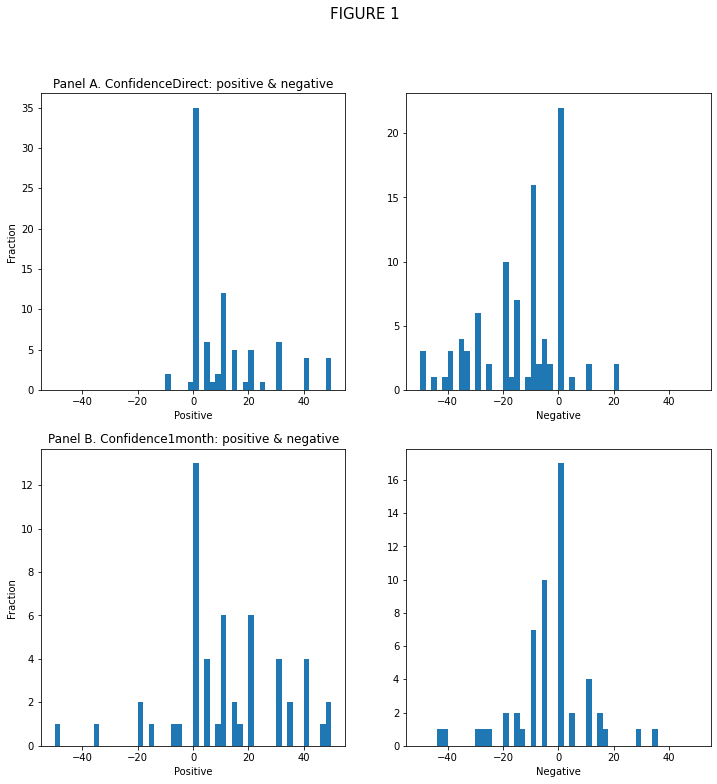

In [12]:
Main_Figure1(df)

Figure 1 is an easy way to view the belief adjustments of the subjects, even though, they aren't enough for causal inference. As it is observable from Panel A. subjects adjusted their beliefs in line with the feedback they have received. For instance, in the positive feedback group, we see the accumulation of observations between 0 and +50 while an opposite pattern is observable for the negative feedback group.

In Panel B. we see that for the individuals who have received positive feedback, the pattern observe is not so much different from the pattern in Panel A. However, the graph significantly changes for the negative feedback when subjects elicit their beliefs 1 month after the feedback.

### 6.1.3 Belief Adjustment Distribution  & Test performances

**Calculating Bayesian Predictions**

In [13]:
#Bayesian predictions
get_Bayesian_predictions(df)

In [14]:
#Calculating Bayesian Posterior Median Beliefs
df["posterior_median_bayes"] = (df["post_1"] + df["post_2"] + df["post_3"] + df["post_4"] + df["post_5"])*100

In [15]:
##Bayesian predictions for belief adjustment
df["beliefadjustment_bayes"] = df["posterior_median_bayes"] - df["prior_median"]

#Normalization of Bayesian predictions
df["beliefadjustment_bayes_norm"] = np.nan
df.loc[df['dummynews_goodbad'] == 0, 'beliefadjustment_bayes_norm'] = df['beliefadjustment_bayes']
df.loc[df['dummynews_goodbad'] == 1, 'beliefadjustment_bayes_norm'] = df['beliefadjustment_bayes']*-1

There are two sub treatment groups in the immediate treatment: confidence_direct_15minuteslater' and 'confidence_direct_immediate'. Zimmermann(2020) made this differentiation for a robustness check to see whether there would be a difference between eliciting beliefs immediately after feedback or 15 minutes later. However, the main results derived from the comparison between 1-month treatment and pooled treatment which combines 15 minutes later and immediate treatment. So, a dummy is created for further analysis; with 1 indicating treatment 1 month and 0 indicating pooled direct treatment.

In [16]:
#Generate dummy for direct treatment and 1 month treatment
df["dummytreat_direct1month"] = np.nan
df.loc[(df['treatgroup'] == 3) | (df['treatgroup'] == 4), 'dummytreat_direct1month'] = 0
df.loc[df['treatgroup'] == 2, 'dummytreat_direct1month'] = 1

In [17]:
#Grouping IQ test scores
df["test_1"] = np.nan
df.loc[(df['rscore'] == 0) | (df['rscore'] == 1) | (df['rscore'] == 2) | (df['rscore'] == 3) | (df['rscore'] == 4), 'test_1'] = 1
df.loc[(df['rscore'] == 5), 'test_1'] = 2
df.loc[(df['rscore'] == 6), 'test_1'] = 3
df.loc[(df['rscore'] == 7) | (df['rscore'] == 8) | (df['rscore'] == 9) | (df['rscore'] == 10), 'test_1'] = 4

In [18]:
#Average prior belief
df['prior_av'] = df.groupby(['test_1', 'dummytreat_direct1month'])["prior_median"].transform('mean')

In [19]:
#Average posterior belief if feedback is positive
df['post_av_pos'] = df[df["dummynews_goodbad"] == 0].groupby(['test_1', 'dummytreat_direct1month'])["posterior_median"].transform('mean')

In [20]:
#Average posterior belief if feedback is negative
df['post_av_neg'] = df[df["dummynews_goodbad"] == 1].groupby(['test_1', 'dummytreat_direct1month'])["posterior_median"].transform('mean')

<function auxiliary.auxiliary_plots.Main_Figure2(df)>

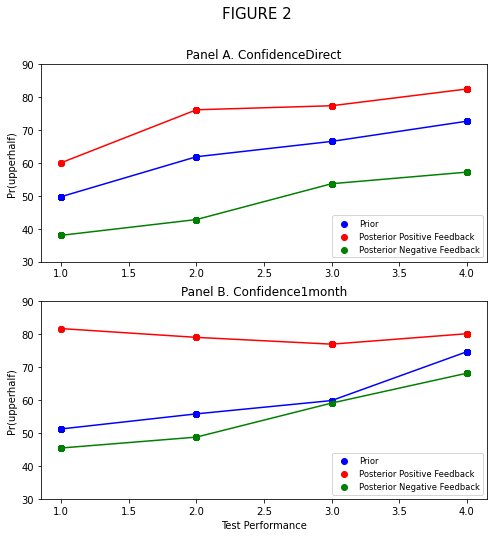

In [21]:
Main_Figure2(df)

Figure 2 plots the individuals' prior and posterior belief of being in the upper half of their group for differents levels in test performances. Test performances are grouped as 1, 2, 3 and 4; with 1 being the lowest score group. Also, posteriors are plotted with two different lines.

It is easy to see that in Panel A. ConfidenceDirect, subject's posterior beliefs visibly differ from their prior beliefs in line with the feedback they received. However, in Panel B, the posterior beliefs of subjects that received negative feedback are visibly closer to the prior beliefs.

Compared to the first graph, here causal inference is made possible by grouping individuals according to their test scores.

These figures are also a great way to observe ex-ante overconfident-average priors lie consistently above 50 percent- which can be theoretically explained by Bayesian updating (see. Benoît and Dubra, 2011) and also visible in the figures from the study of Zimmermann (2020).

### 6.1.4. Regression Outputs

In the study, Zimmermann (2020) perform 8 OLS estimations(see in Table 1) with type HC1 heteroscedasticity robust covariance. :<br>
(1) Regressing $y_i$ (normalized belief adjustment) on $T_i$ (treatment type) in case of positive feedback<br>
(2) Same as (1) but controling for $X_i$ (rank and normalized bayesian belief adjustment)<br>
(3) Regressing $y_i$ (normalized belief adjustment) on $T_i$ (treatment type) in case of negative feedback<br>
(4) Same as (3) but controling for $X_i$ (rank and normalized bayesian belief adjustment)<br>
(5) Regressing $y_i$ (normalized belief adjustment) on $T_i$ (treatment type), $feedback_i$ (feedback type) and $I_i$ (interaction term indicating whether individual is in the interest group or not)<br>
(6) Same as (5) but controling for $X_i$ (rank and normalized bayesian belief adjustment)<br>
(7) Same as (5) but including rank fixed effects with their interaction with treatment<br>
(8) Same as (7) but controling for $X_i$ (normalized bayesian belief adjustment)<br>

In [22]:
df_good = pd.DataFrame({"beliefadjustment_normalized": df[df["dummynews_goodbad"] == 0]['beliefadjustment_normalized'], "dummytreat_direct1month": df[df["dummynews_goodbad"] == 0]['dummytreat_direct1month'], "rank": df[df["dummynews_goodbad"] == 0]['rank'], "beliefadjustment_bayes_norm": df[df["dummynews_goodbad"] == 0]['beliefadjustment_bayes_norm']})
#(1)
model_ols = smf.ols(formula="beliefadjustment_normalized ~ dummytreat_direct1month", data=df_good)
reg_1 = model_ols.fit(cov_type='HC1')
#(2)
model_ols = smf.ols(formula="beliefadjustment_normalized ~ dummytreat_direct1month + rank + beliefadjustment_bayes_norm", data=df_good)
reg_2 = model_ols.fit(cov_type='HC1')

In [23]:
df_bad = pd.DataFrame({"beliefadjustment_normalized": df[df["dummynews_goodbad"] == 1]['beliefadjustment_normalized'], "dummytreat_direct1month": df[df["dummynews_goodbad"] == 1]['dummytreat_direct1month'], "rank": df[df["dummynews_goodbad"] == 1]['rank'], "beliefadjustment_bayes_norm": df[df["dummynews_goodbad"] == 1]['beliefadjustment_bayes_norm']})
#(3)
model_ols = smf.ols(formula="beliefadjustment_normalized ~ dummytreat_direct1month", data=df_bad)
reg_3 = model_ols.fit(cov_type='HC1')
#(4)
model_ols = smf.ols(formula="beliefadjustment_normalized ~ dummytreat_direct1month + rank + beliefadjustment_bayes_norm", data=df_bad)
reg_4 = model_ols.fit(cov_type='HC1')

Next regressions are DID models, therefore interaction term for our interest group is added.

In [24]:
#Generating interaction term
df["interact_direct1month"] = df["dummytreat_direct1month"]*df["dummynews_goodbad"]

In [25]:
#(5)
model_ols = smf.ols(formula= "beliefadjustment_normalized ~ dummytreat_direct1month + dummynews_goodbad + interact_direct1month", data=df)
reg_5 = model_ols.fit(cov_type='HC1')
#(6)
model_ols = smf.ols(formula= "beliefadjustment_normalized ~ dummytreat_direct1month + dummynews_goodbad + rank + interact_direct1month + beliefadjustment_bayes_norm", data=df)
reg_6 = model_ols.fit(cov_type='HC1')

Next spesifications are with rank fixed effects to include their interaction with treatment. So rank dummies are generated and added to the regression as well as their interaction term: `rankdummy`$_i$ *`dummytreat_direct1month`.

In [26]:
#Rank dummies
get_rank_dummies(df)

In [27]:
#Intereaction term: Rank dummy*Treatment dummy
get_rank_interation_term(df)

In [28]:
#(7)
model_ols = smf.ols(formula= "beliefadjustment_normalized ~ dummytreat_direct1month + dummynews_goodbad + interact_direct1month + rankdummy1 + rankdummy2 + rankdummy3 + rankdummy4 + rankdummy5 + rankdummy6 + rankdummy7 + rankdummy8 + rankdummy9 + rankdummy1_interact + rankdummy2_interact + rankdummy3_interact + rankdummy4_interact + rankdummy5_interact + rankdummy6_interact + rankdummy7_interact + rankdummy8_interact + rankdummy9_interact", data=df)
reg_7 = model_ols.fit(cov_type='HC1')
#(8)
model_ols = smf.ols(formula= "beliefadjustment_normalized ~ dummytreat_direct1month + dummynews_goodbad + interact_direct1month + beliefadjustment_bayes_norm + rankdummy1 + rankdummy2 + rankdummy3 + rankdummy4 + rankdummy5 + rankdummy6 + rankdummy7 + rankdummy8 + rankdummy9 + rankdummy1_interact + rankdummy2_interact + rankdummy3_interact + rankdummy4_interact + rankdummy5_interact + rankdummy6_interact + rankdummy7_interact + rankdummy8_interact + rankdummy9_interact", data=df)
reg_8 = model_ols.fit(cov_type='HC1')

In [29]:
Main_Table_1(df)

From the first two regressions, it is clear that belief adjustments of individuals in the direct treatment group and the 1-month treatment group did not differ significantly. In other words, time has no significant effect on individuals belief adjustment if they have received positive feedback. These findings overlap with the finding in Zimmermann(2020) that state positive feedback has a persistent effect on belief dynamics.

The (3) and (4) regression also correlates with Zimmermann(2020) findings since it is clear that the belief adjustments are significantly different between treatment groups at the .01 level, referring to the short-term effect of negative feedback.

As it is observable from the column 5 and 6 the interaction term for negative feedback and 1-month treatment group is significant again at the .01 level, in line with the findings from the previous columns. The regression output columns with control variables (rank and Bayesian belief adjustment) also gave the same results in terms of significance levels which strengthens the results. Again these are also in line with the findings of Zimmermann (2020).

The last columns are the DID models with rank effects interacted with treatment group and also includes rank dummy controls, as it is observable the interaction term for negative feedback and 1-month treatment group is significant again at the .05 level in (7) and at the .01 level in (8).

Overall, all of the results and all of the values are exactly the same as the ones in the study of Zimmermann (2020); confirming the researcher's results.

---
## 6.2. Robustness Checks
---
Some parts of the Appendix that would be relavant for the extension part of this project is added to the project notebook.

### 6.2.1 Appendix A.4 - Alternative Definition of Positive/Negative Feedback

##### **Heterogenous Feedbacks**

Basically, to be considered to receive a positive or negative feedback, a subject should receive all the comparisons as the same kind; positive feedback if he/she received 3 positive comparisons and negative feedback if he/she received 3 negative comparisons.

In [30]:
#Creating the new feedback dummy accordingly
df["dummynews_goodbad_h"] = np.nan
df.loc[df['pos_comparisons'] == 3, 'dummynews_goodbad_h'] = 0
df.loc[df['pos_comparisons'] == 0, 'dummynews_goodbad_h'] = 1

In [31]:
Appendix_Table_1(df)

All of the values mimic the values in Table 1 in terms of significance, which means the definition of feedback in the main study was robust. However, for the negative feedback, the coefficients are larger than the previous results which might suggest more negative feedback may affect belief adjustment more negatively.


---
### 6.2.2 Appendix A.6 - Updating in the Short-Run
---
Looking specifically at short-run updating is not the main aim of Zimmermann(2020), however, the researcher finds it relevant to include the results from data. As it is also mentioned in the study, previous findings on short-term belief updating suggest two phenomena: conservatism (Möbius et al., 2013) and asymmetry (Eil and Rao, 2011).

**Conservatism**

According to Bayes' rule, people should adjust their belief by about 20 percentage points, on average after a signal. However, Zimmermann (2020) found a way lower normalized belief adjustment value of 11.80 while the correlation between Bayesian predictions and belief adjustment is being 0.459.

In [32]:
df_short = df[df['treatgroup'] == 4]
df_short['beliefadjustment_normalized'].mean()

11.802197802197803

In [33]:
correlation = df_short[['beliefadjustment_normalized','beliefadjustment_bayes_norm']].corr(method='pearson')
correlation

,beliefadjustment_normalized,beliefadjustment_bayes_norm
beliefadjustment_normalized,1.0000000,0.4585338
beliefadjustment_bayes_norm,0.4585338,1.0000000


**Asymmetry**

In order to investigate asymmetry, Zimmermann (2020) analyze the effect of Bayesian predictions on belief adjustments, separately for positive and negative feedback.

In [34]:
Appendix_Table_3(df)

As it is suggested by the findings in Column 3, DID reveals no significant relationship. In other words, the Bayesian predictions don’t significantly differ between feedback groups. However, clearly, the coefficient for Bayesian prediction is slightly larger in positive information than in negative information which suggests some asymmetry.

### 6.2.3. Appendix A.7 - No Feedback Condition

<AxesSubplot:title={'center':'No Feedback'}, xlabel='Belief Adjustment', ylabel='Fraction'>

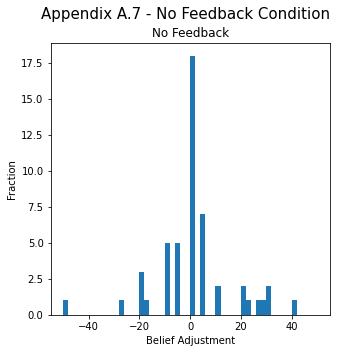

In [35]:
Appendix_Figure_1(df)

The figure clearly demonstrates that in absence of feedback, many subjects do not change their beliefs and a clear symmetry is observable for those who changed their beliefs.

In [36]:
#Stats for control group; the only numbers I couldn't get exactly from the study of Zimmermann (2020) is the numbers below.
#The reported mean belief adjustment being 0.22, with a standard deviation of 17.83.
df[df['treatgroup'] == 7]['beliefadjustment'].describe()

count    51.0000000
mean      0.8039216
std      15.4687034
min     -50.0000000
25%      -5.0000000
50%       0.0000000
75%       5.0000000
max      40.0000000
Name: beliefadjustment, dtype: float64

### 6.2.4. Appendix A.8 - Figures Bayesian Posteriors

In [37]:
#Calculating Bayesian Posterior Averages
df['prior_av_b'] = df.groupby(['test_1', 'dummytreat_direct1month'])["prior_median"].transform('mean')
df['post_av_pos_b'] = df[df["dummynews_goodbad"] == 0].groupby(['test_1', 'dummytreat_direct1month'])["posterior_median_bayes"].transform('mean')
df['post_av_neg_b'] = df[df["dummynews_goodbad"] == 1].groupby(['test_1', 'dummytreat_direct1month'])["posterior_median_bayes"].transform('mean')

<function auxiliary.auxiliary_plots.Appendix_Figure_2(df)>

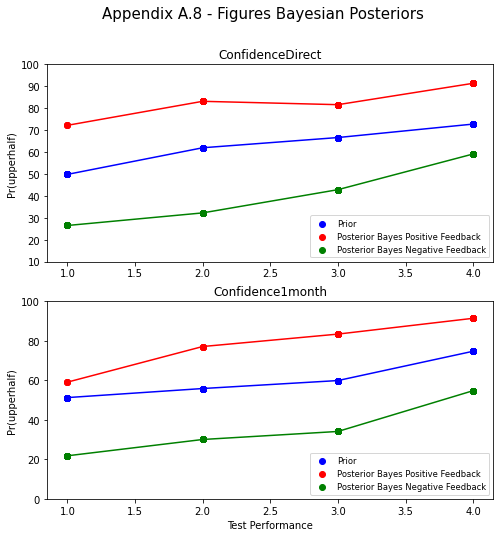

In [38]:
Appendix_Figure_2(df)

This figure is the same as Figure 2 only here Bayes prediction of posterior beliefs are used instead of actual posteriors.

---
# 7. Extension
--- 

The extension consist of two parts.

In the first part, I will replicate the first part of the study of Eil and Rao (2011) which is a quite similar experiment in terms of experimental design and empirical strategy that has been used. I think replicating an experiment that Zimmermann(2020) had taken reference would be beneficial to understand the motives and aims of Zimmermann(2020) while forming his study in the way it has been done. Also, I made use of some parts of the Eil and Rao (2011) study in the second part of the extension.

In the second part, I will present the extensions I have added such as data visualizations and further analysis on the effect of feedback.


---
## 7.1. Replication of Eil and Rao (2011)

As an extension, I decided to replicate the study of Eil and Rao (2011) which is a relevant experiment that is also quite oftenly mentioned by Zimmermann (2020) in their study.

### 7.1.1. Introduction and Experiment Design
The experiment consists of 3 main parts. I decided to replicate the first part of the experiment that analyzes the posterior beliefs of the subjects receiving the most “extreme” feedback(all positive or all negative). 

Eil and Rao (2011) main aim in this experiment is to observe the asymmetry in the belief updating when subjects receive different types (positive and negative) of signals. Unlike Zimmermann (2020), Eil and Rao (2011) didn’t vary the time between treatments but varied the scoring method(referred to as image task) of subjects. The subjects who are assigned to an image task, either scored according to their IQ test or physical attractiveness(beauty) and also a control group task. 

### 7.1.2. Experiment Design

The experiment is also quite similar to the study of Zimmermann(2020) by nature.

1. Subjects were first either taken an IQ test and assigned to groups of 10 or went through a series of speed dates with 10 other people and asked to give a rating to each in terms of their physical attractiveness from 1 to 10.
2. After the tasks, subjects were asked to elicit their belief about their ranking within their group of 10.
3. Then subjects received 3 cards that revealed whether they were ranked higher or lower than their randomly picked groupmates. For the control task, they were told the number on the cards was randomly picked. Belief elicitation was done in three rounds since subjects were asked to elicit their beliefs about their ranks within the group after each card.


**Variable Definitions**


|Variable name|Definition|Beauty|IQ|Control|
|---|---|---|---|---|
|`meanbelief_priorbayesimage`|Mean Bayesian belief prediction calculated from prior belief|√|√||
|`meanbelief_priorbayescard`|Mean Bayesian belief prediction calculated from prior belief|||√|
|`frac_upimage`|0 if good news, 1 if bad news|√|√||
|`frac_upcard`||||√|
|`mb_fracup`|interaction term: $meanbelief_priorbayesimage_i$*$frac_upimage_i$|√|√||
|`mb_fraccard`|interaction term: $meanbelief_priorbayescard_i$*$frac_upcard_i$|||√|

### 7.1.3. Emprical Strategy 

Even though, a model is not specified in the study of Eil and Rao (2011). One can come up with the following DID model for the estimations presented in the Table 1:

\begin{equation}
meanbelief_i = \alpha + \beta meanBayesian_i + \gamma feedback_i + \delta I_i + \epsilon_i
\end{equation}

where $feedback_i$ is the dummy variable for feedback and $meanBayesian_i$ is the mean Bayesian belief prediction. $I_i$ is for the interaction term that is generated by $meanBayesian_i$*$feedback_i$. Bayesian predictions are calculated using reported priors and the received signal type; then the term mean Bayesian, `meanbelief_priorbayesimage`, is produced by taking the expected rank according to posteriors reported through the rounds.

### 7.1.4. Replication

In [39]:
#Importing the adjusted and merged data set provided by the Eil and Rao (2011)
df_ex = pd.read_stata('data/extension.dta')

The first figure presented by Eil and Rao (2011) is formed by regressing the subject's observed mean belief on the predicted mean belief using Bayes' Rule and grouping subjects by the feedback type that they have received.

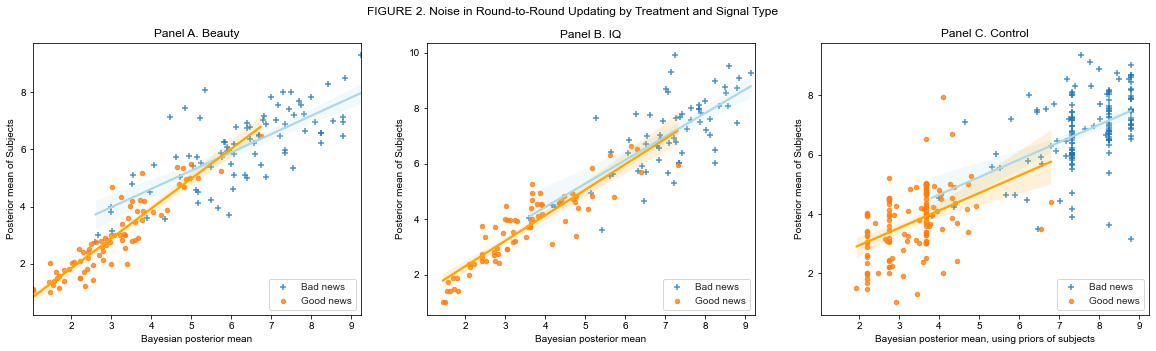

<function auxiliary.auxiliary_plots.Extension_Figure_1(df_ex)>

In [40]:
Extension_Figure_1(df_ex)

At first glance, a visible asymmetry can be observed in the Beauty group between good and bad news; while such asymmetry is not that pronounced in the IQ test group. We interpret this asymmetry by the difference in slopes of the lines. As it can be seen in Panel A. bad news condition has a flatter slope, meaning that actual posteriors' have a shorter value length which means even though bayesian posteriors might suggest extreme updating the actual updating is relatively more conservative. In other words, the slope of the bad news line suggests an insensitivity to signal strength. Compared to bad news, we see a steeper slope for good news which suggests an exaggerated response to signal strength. Therefore, an asymmetry in responses for Beauty treatment is pronounced. If we look at Panel C. Control group we see a constant slope which implies that such asymmetries are the results of image treatments. The slope of the good news line in IQ treatments is also steeper compared to the control group however, not as much as it is in Beauty treatment.

Another feature to analyze in this figure is the observations scattered around the fitted line. If we compare the two treatment groups, it is clear that beliefs are noisier for bad news as it is for good news.

Also, it is worth noting that having slopes equal to zero and negative intercept would imply optimism in beliefs in general.

In [41]:
#Used regressions in Extension Figure 2 with the standard errors clustered at subject level
reg_B_b_ = cluster_fit('meanbeliefimage ~ meanbelief_priorbayesimage + mb_fracup + frac_upimage',
                           data=df_ex[(df_ex['frac_upimage'] == 0) & (df_ex['IQtask'] ==0)], group_var='ID')
reg_B_g_ = cluster_fit('meanbeliefimage ~ meanbelief_priorbayesimage + mb_fracup + frac_upimage',
                           data=df_ex[(df_ex['frac_upimage'] == 1) & (df_ex['IQtask'] ==0)], group_var='ID')
    
reg_IQ_b_ = cluster_fit('meanbeliefimage ~ meanbelief_priorbayesimage + mb_fracup + frac_upimage',
                            data=df_ex[(df_ex['frac_upimage'] == 0) & (df_ex['IQtask'] ==1)], group_var='ID')
reg_IQ_g_ = cluster_fit('meanbeliefimage ~ meanbelief_priorbayesimage + mb_fracup + frac_upimage',
                            data=df_ex[(df_ex['frac_upimage'] == 1) & (df_ex['IQtask'] ==1)], group_var='ID')
    
reg_C_b_ = cluster_fit('meanbeliefcard ~ meanbelief_priorbayescard + mb_fracupcard + frac_upcard',
                           data=df_ex[(df_ex['frac_upcard'] == 0)], group_var='ID')
reg_C_g_ = cluster_fit('meanbeliefcard ~ meanbelief_priorbayescard + mb_fracupcard + frac_upcard',
                           data=df_ex[(df_ex['frac_upcard'] == 0)], group_var='ID')

<function auxiliary.auxiliary_plots.Extension_Figure_2(df_ex)>

<Figure size 1080x1080 with 0 Axes>

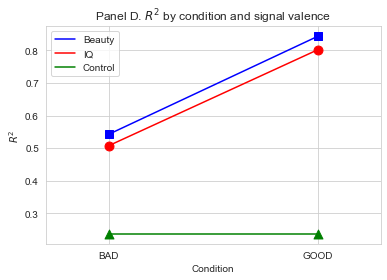

In [42]:
Extension_Figure_2(df_ex)

Panel. D represents the plots of the R^2s from the regressions used in Extension Table 1 but divided according to the type of feedback. Unfortunately, even though I used regressions with standard errors clustered at the subject level as is described by Eil and Rao (2011); I couldn’t get the R^2 value of the IQ test/good newsgroup right, which is confusing since I get exactly the same result from the pooled regression in the Extension Table 1. According to Eil and Rao (2011), the $R^2$ for IQ/good newsgroup should be below 0.7.

Taking the result of Eil and Rao (2011) as a reference point, R^2 differ for the Beauty and IQ group while that is obviously not the case for the Control group.

**Table 1**

In [43]:
#Used regressions in Extension Table 1 with the standard errors clustered at subject level
reg_B = cluster_fit('meanbeliefimage ~ meanbelief_priorbayesimage + mb_fracup + frac_upimage', data=df_ex[(((df_ex['frac_upimage'] == 0) | (df_ex['frac_upimage'] == 1)) & (df_ex['IQtask'] ==0))], group_var='ID')
reg_IQ = cluster_fit('meanbeliefimage ~ meanbelief_priorbayesimage + mb_fracup + frac_upimage', data=df_ex[(((df_ex['frac_upimage'] == 0) | (df_ex['frac_upimage'] == 1)) & (df_ex['IQtask'] ==1))], group_var='ID')
reg_C = cluster_fit('meanbeliefcard ~ meanbelief_priorbayescard + mb_fracupcard + frac_upcard', data=df_ex[(df_ex['frac_upcard'] == 0) | (df_ex['frac_upcard'] == 1)], group_var='ID')

In [44]:
Extension_Table_1(df_ex)


                            Beauty     IQ   Control
---------------------------------------------------
Intercept                  2.05***  1.05    2.29***
                           (0.52)   (0.76)  (0.76) 
R-squared                  0.87     0.87    0.72   
R-squared Adj.             0.86     0.87    0.71   
frac_upcard                                 -0.53  
                                            (0.95) 
frac_upimage               -2.31*** -0.58          
                           (0.54)   (0.81)         
mb_fracup                  0.41***  0.07           
                           (0.10)   (0.13)         
mb_fracupcard                               -0.00  
                                            (0.19) 
meanbelief_priorbayescard                   0.59***
                                            (0.10) 
meanbelief_priorbayesimage 0.64***  0.85***        
                           (0.08)   (0.10)         
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


---
*See below for a reader friendly version of the Extension Table 1 that I created with the same values.*

||Beauty|IQ|Control|
|---|---|---|---|
|Intercept|**2.05** |1.05 |**2.29** |
||(0.52)|(0.76)|(0.76)|
|Bayesian μ|**0.64** |**0.85** |**0.59** |
||(0.08)|(0.85)|(0.10)|
|Bayesian μ *1{All positive feedback}|**0.41** |0.07 |-0.00 |
||(0.10)|(0.13)|(0.19)|
|1{All positive feedback}|**-2.31** |-0.58 |-0.53 |
||(0.54)|(0.81)|(0.95)|
|Intercept|**2.05** |**1.05** |**2.29**|
||(0.52)|(0.76)|(0.76)|
|$R^2$|0.87|0.87|0.72 |
|$R^2$ Adj.|0.86|0.87 |0.71|
||Standard errors in parentheses. * p<.1, *p<.05*, ***p<.01|

The findings found in Extention Table1 are in furtherance of the interpretations made for the Extention Figure2. Like it is suggested by the figure, the asymmetry in belief dynamics-the difference between positive and negative feedback conditions- is only significant in Beauty at the 0.01 level of significance.

### 7.1.5. Comparison with Zimmermann (2020)

It is easy to see the two experiments share a lot of experimental and empirical strategies. First of all, both studies have a longitudinal feature since they elicit subjects’ beliefs two times. Secondly, the two studies have the same focus which is the asymmetry in belief dynamics that arise as a result of feedback type. In addition, both studies make use of DID models in their predictions. Nevertheless, while Eil and Rao (2011) are used the heterogeneous definition of feedbacks, Zimmermann(2020) choose to allow homogenous comparison types within feedback groups- even though a robustness check is made (see Appendix A.4)-.  A fundamental difference is the employment of treatment groups. While Eil and Rao (2011) were interested in belief updating in different tasks (Beauty and IQ), Zimmermann (2020) was interested in belief updating when elicitation time differs (Direct and 1 month). Therefore, all of the results Eil and Rao (2011) found was derived from short-run updating. At this point, it is intriguing that whether the difference between the tasks would be as pronounce as it was; if Zimmermann (2020) also had a Beauty image task that is also measured after 1 month.

---
## 7.2. Further Extension
---
### 7.2.1. Alternative Data Visualizations

<function auxiliary.auxiliary_plots.Extension_Figure_3(df)>

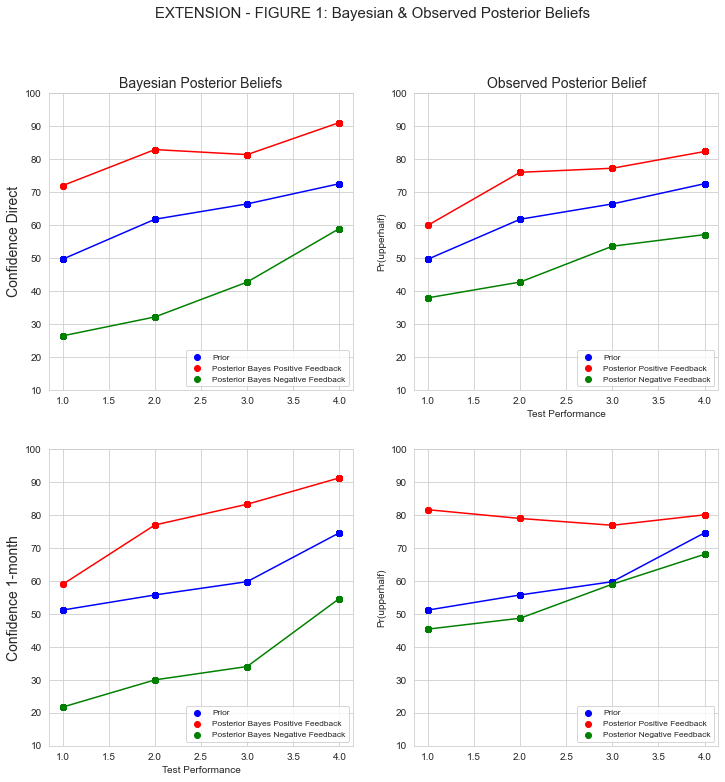

In [45]:
Extension_Figure_3(df)

As a small extension, I decided to create a figure to combine the figure from Appendix A.8 with Figure 2 since it would be a good way to view posterior beliefs in comparison with Bayesian predictions.

If we look at the first row we see that observed beliefs follow a relatively similar pattern, in terms of subjects' reported percentages of being in the upper half of the group, to Bayesian predictions compared to the second row where graphs differ visibly.

Also, in the short run, it is easy to see that people are conservative in belief updating. For instance, in the group of high test scores and positive feedback, according to Bayes' Rule, one would expect a posterior slightly above %90 while it is only slightly above %80; suggesting a difference near %10 percent.

The opposite can be observable in long-run belief updating in the negative feedback group since in every test score group people reported posterior beliefs that are much higher than Bayesian predictions-especially for the individuals with lower test scores. What I found interesting in the results from long-run, is the difference in belief updating when feedback is positive. In the last figure, we see that no matter the test scores individuals tend to report a belief near %80 percent when they receive positive feedback. I think this would be a good starting point for further research in dynamic beliefs.

---
Making use of Extention Figure 2 from the study of Eil and Rao (2011), I created two similar data visualization using the data of Zimmermann (2020).

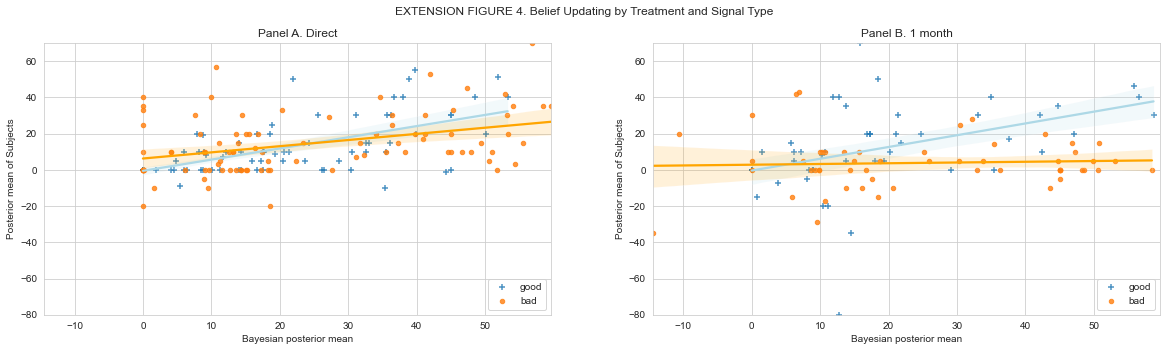

<function auxiliary.auxiliary_plots.Extension_Figure_4(df)>

In [46]:
Extension_Figure_4(df)

In both figures, negative feedback lines are flatter and specifically very flat in Panel B. 1 month treatment. Meaning that in both treatment groups subjects'  weighed negative information less heavily than positive information and even much less heavily in 1-month treatment.

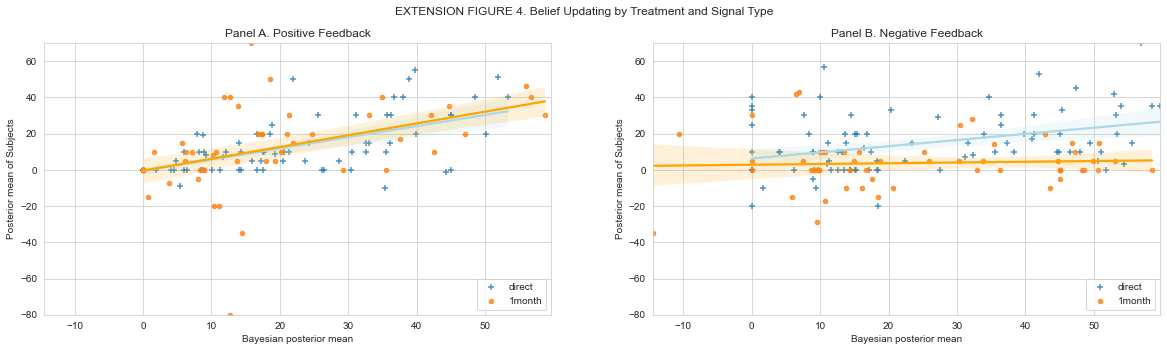

<function auxiliary.auxiliary_plots.Extension_Figure_5(df)>

In [47]:
Extension_Figure_5(df)

In this visiualization, it is easier to see the asymmetry between positive and negative feedback. If we look at Panel A. Positive Feedback, we see that slopes of fitted lines of direct and 1month treatment are almost the same; while in Panel B. they clearly differ.


## 7.3. Further Analysis with No Feedback Group

As a control group, Zimmermann (2020) also added a group where no feedback is given to the subjects. The main aim of adding this group was the investigate the potential time trends in beliefs that may exist independently of receiving feedback. However, I couldn't find any further analyzes with this group neither in the study or appendix-except the visiualization in Appendix A.7.

So as a further analyze I decided to investigate the difference between feedback(positive or negative) and no feedback groups within the 1-month condition to see whether receiving feedback itself cause a difference in belief adjustment.

---
### 7.3.1. Estimation Strategy  

For my analysis, I made use of a simple difference-in-difference model of the following kind:

\begin{equation}
belief_i = \alpha + \beta dummyfeedback_i + \gamma secondwave_i + \delta I_i + \epsilon_i
\end{equation}

where $dummyfeedback_i$ is the dummy variable for receiving feedback and $secondwave_i$ is the dummy for posterior belief. $I_i$ is for the interaction term that is generated by $dummyfeedback_i$*$secondwave_i$.

For the estimation, I reshaped data to have a single belief variable combining posterior and prior beliefs and to have a time variable that qualifies in which time the belief is elicited.

### 7.3.2. Estimation  

In [48]:
#Making a copy of the original data to start the reshape
df_control = df

In [49]:
#Generating an ID number for each participant
df_control['ID'] = df_control.index + 1

In [50]:
#Filtering data to have only 1 month and no feedback treatment
df_control = df[(df['treatgroup'] == 2) | (df['treatgroup'] == 7)]

In [51]:
#Filtering and adjusting data
df_control = df[(df['treatgroup'] == 2) | (df['treatgroup'] == 7)]
df_control = df_control[['ID', 'treatment', 'posterior_median', 'prior_median']]
df_control.rename(columns = {"prior_median": "belief1", "posterior_median": "belief2" }, inplace=True)
df_control["ID"] = df_control.index

In [52]:
#Transforming data from a wide format to long format
df_control = pd.wide_to_long(df_control, stubnames='belief', i="ID", j="time")

In [53]:
#Creating a column with time index
df_control = df_control.reset_index(level=1)

In [54]:
#Final data
df_control

,time,treatment,belief
ID,,,
115,2,confidence_1monthlater,90.0
116,2,confidence_1monthlater,50.0
117,2,confidence_1monthlater,30.0
118,2,confidence_1monthlater,80.0
119,2,confidence_1monthlater,0.0
...,...,...,...
679,1,nofeedback,100.0
680,1,nofeedback,55.0
681,1,nofeedback,50.0


In [55]:
get_variables_for_extension(df_control)

In [56]:
Extension_Table_2(df_control)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 belief   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.5177
Date:                Thu, 22 Jul 2021   Prob (F-statistic):              0.670
Time:                        21:34:04   Log-Likelihood:                -1458.1
No. Observations:                 318   AIC:                             2924.
Df Residuals:                     314   BIC:                             2939.
Df Model:                           3                                         
Covariance Type:                  HC1                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              65.9608      3.797     17.371      0.000      58.518      73.403
dummy_feedback         -3.1182      4.358     -0.715      0.474     -11.660       5.424
secondwave              0.2157      5.185      0.042      0.967      -9.947      10.378
feedback_secondwave     3.2843      6.035      0.544      0.586      -8.544      15.113
==============================================================================
Omnibus:                        9.123   Durbin-Watson:                   1.766
Prob(Omnibus):                  0.010   Jarque-Bera (JB):                8.163
Skew:                          -0.327   Prob(JB):                       0.0169
Kurtosis:                       2.566   Cond. No.                         8.62
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

The p-value of the interaction term implies that the difference is insignificant. Therefore, one can conclude that receiving feedback does not have an effect on beliefs solely. In other words, the change in beliefs is not significant between feedback and no feedback group.

---
# 8. Conclusion
---

In sum, all of the results I get from using the data and STATA codes provided by Zimmmermann (2020) overlaps with the ones in the study. Except for the stats in Appendix A.7., I manage to get the same numbers and figures presented in the study. Similarly, for the extension replication, I used the merged and reshaped data provided by Eil and Rao. Using the Stata codes provided by the researchers, I manage to get the same results except the $R^2$ values represented in the Extension Figure 2.

In light of these, I can conclude that even though individuals adjust their beliefs accordingly- and in line with Bayesian predictions- in short term; the effects of negative feedback tend to fade away over time while positive feedback has a long-lasting effect on belief adjustment. According to my analysis done with the control group, the feedback itself solely doesn't have a significant effect on beliefs.

Finally, the Difference-in-Difference models used in both of the studies and my analysis, are good tools when researchers want to analyze observations draw from a between-subjects experimental design.

---
# 9. References
---

[Benoît, Jean-Pierre, and Juan Dubra. 2011. “Apparent Overconfidence?” Econometrica 79 (5):
1591–1625.](https://doi.org/10.3982/ECTA8583)

[Eil, David, and Justin M. Rao. 2011. “The Good News-Bad News Effect: Asymmetric Processing of Objective Information about Yourself.” *American Economic Journal: Microeconomics* 3 (2): 114–38.](https://doi.org/10.1257/mic.3.2.114)

Möbius, Markus M., Muriel Niederle, Paul Niehaus, and Tanya S. Rosenblat. 2013. “Managing
Self-Confidence: Theory and Experimental Evidence.” Unpublished.

[Zimmermann, F. 2020. “The Dynamics of Motivated Beliefs.” *American Economic Journal: Microeconomics* 110 (2): 337–363.](https://doi.org/10.1257/aer.20180728)